In [1]:
import torch
from modelling_sae import *
import matplotlib.pyplot as plt

D_MODEL = 1024
RATIO = 4

In [2]:
ica = KurtosisICA(D_MODEL, D_MODEL * RATIO, 0, nonneg=True).cuda()
ica.load_state_dict(torch.load('models/epoch_99/KurtosisICA_1.00e-09.pt'))

sae = BasicSAE(D_MODEL, D_MODEL * RATIO, 0).cuda()
sae.load_state_dict(torch.load('models_old/epoch_9/SAE_1.00e-05.pt'))

ica_dict = ica.dictionary
sae_dict = sae.dictionary

def self_similarity_histogram(dictionary):
    cosine_sims = torch.einsum('id,jd->ij', dictionary, dictionary)
    cosine_sims -= torch.eye(cosine_sims.shape[0]).cuda()
    max_cosine_sims = torch.max(cosine_sims, dim=1).values

    plt.hist(max_cosine_sims.cpu().numpy(), bins=50)
    plt.xlabel('Cosine Similarity')
    plt.ylabel('Frequency')
    plt.title('Histogram of Maximum Cosine Similarities')
    plt.show()

def to_other_similarity_histogram(dictionary, target_dictionary):
    cosine_sims = torch.einsum('id,jd->ij', dictionary, target_dictionary)
    max_cosine_sims = torch.max(cosine_sims, dim=1).values

    plt.hist(max_cosine_sims.cpu().numpy().flatten(), bins=50)
    plt.xlabel('Cosine Similarity')
    plt.ylabel('Frequency')
    plt.title('Histogram of Cosine Similarities to Other Dictionary')
    plt.show()

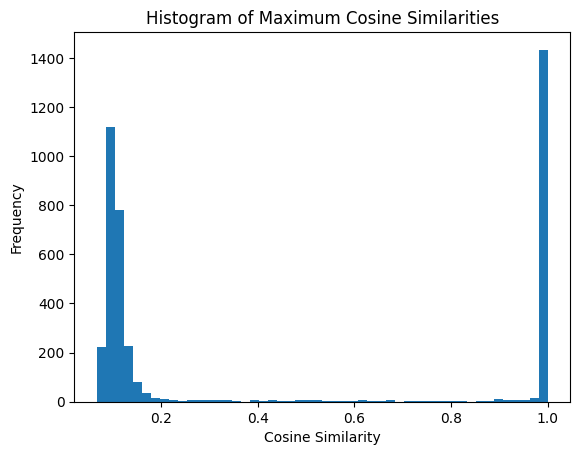

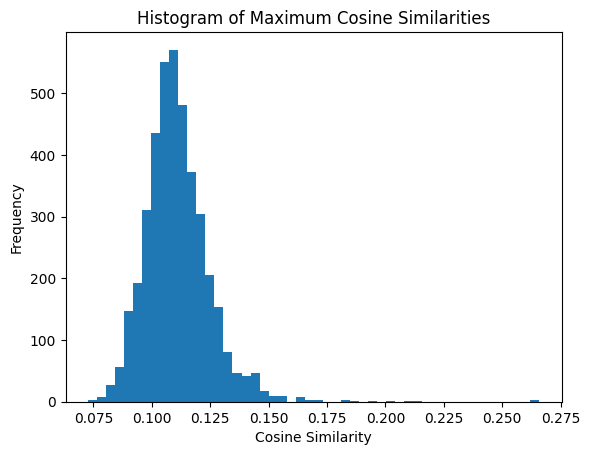

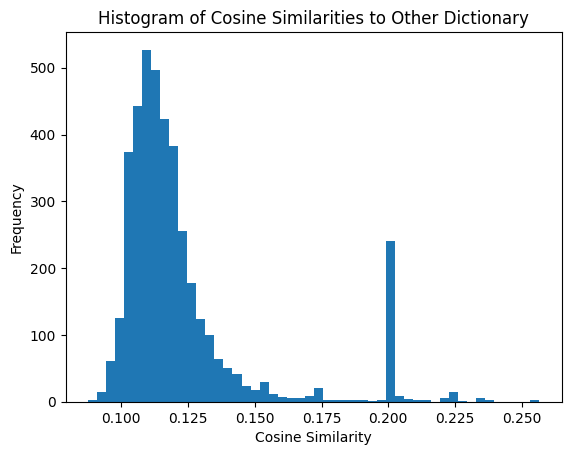

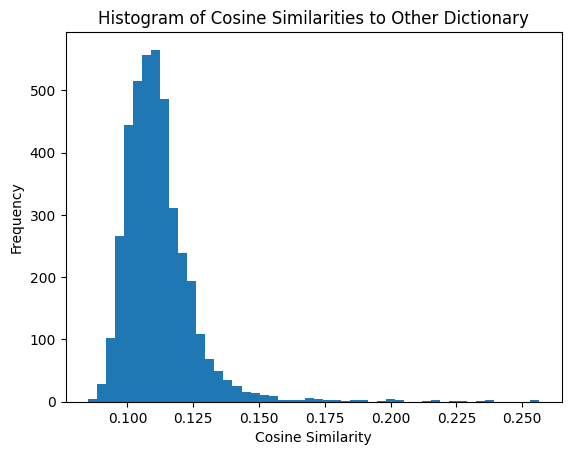

In [3]:
self_similarity_histogram(ica_dict)
self_similarity_histogram(sae_dict)

to_other_similarity_histogram(ica_dict, sae_dict)
to_other_similarity_histogram(sae_dict, ica_dict)